In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd
import seaborn as sns# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hmeq-data/hmeq.csv


# IESB
## Pós Graduação em Ciência de Dados

### **Disciplina** - Data Mining e Machine Learning II
### **Projeto de Conclusão da Disciplina **
### **Aluno:** Nilson Romero Michiles Júnior
### **Turma:** Asa Norte

 
#### Descrição do Problema e Objetivo

Os Bancos possuem uma necessidade de manter seu percentual de inadimplência baixo, sendo mais oneroso ainda tentar recuperar créditos de habitação(Home Equity), tendo em vista as proteções que a legislação concede aos inadimplentes dessa modalidade. Visto isso, urge a necessidade dos Bancos atuarem preventivamente para identificar possíveis maus pagadores e evitar possíveis adversidades futuras. 

Assim, esse modelo de dados apresenta preditor para identificar esses maus pagadores, por meio de um conjunto de dados de Home Equity com   cerca de seis mil empréstimos concedidos no passado. Esses dados contêm várias informações sobre a situação do cliente no momento do empréstimo e também contêm uma coluna 'RUIM', que indica se o cliente deixou de pagar o empréstimo posteriormente. Podemos usar esse conjunto de dados juntamente com a variável/etiqueta "RUIM" para treinar modelos de aprendizado de máquina, o que nos ajudaria a prever a probabilidade de alguém deixar o empréstimo no futuro com base na situação atual. 

Assim, ao final deste notebook será proposto o melhor modelo a ser usado para prever a etiqueta supramencionada baseada no padrão da situação apresentada nos dados. Esse problema pode ser classificado como problema de classificação binária, pois o modelo preverá se uma pessoa seria o padrão.


#### Metodologia

A base de dados "Home Equity" possui dados pessoas e informações de empréstimo de 5.960 empréstimos recentes. Para cada empréstimo existem 12 variáveis registradas. A variável alvo (BAD) indica quando o cliente não pagou o empréstimo (valor 1), e quando ele honrou o compromisso (valor 0).

Serão utilizados os modelos Random Forest Classifier, XGBosst e XGBoost com auxílio do GridSearchCV para otimização do modelo

### Dicionário de Dados
O dicionário de dados das colunas disponíveis no Dataset estão elencadas abaixo:

**BAD:** 1 = client defaulted on loan 0 = loan repaid

**LOAN**: Amount of the loan request

**MORTDUE**: Amount due on existing mortgage

**VALUE**: Value of current property

**REASON**: DebtCon = debt consolidation ; 
HomeImp = home improvement

**JOB**: Six occupational categories

**YOJ**: Years at present job

**DEROG**: Number of major derogatory reports

**DELINQ**: Number of delinquent credit lines

**CLAGE**: Age of oldest trade line in months

**NINQ**: Number of recent credit lines

**CLNO**: Number of credit lines

**DEBTINC**: Debt-to-income ratio

### Importando o Dataset 

In [2]:
df = pd.read_csv('/kaggle/input/hmeq-data/hmeq.csv')
df.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

### Exploração do Dataset

In [3]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


((5960, 13), None)

Observa-se que Dataset possui 5960 linhase  13 colunas, sendo apenas as colunas 'JOB' e 'REASON' com valores não númericos

In [4]:
# Estatísticas Descritivas
df.describe(include='all')

BAD          LOAN        MORTDUE          VALUE   REASON  \
count   5960.000000   5960.000000    5442.000000    5848.000000     5708   
unique          NaN           NaN            NaN            NaN        2   
top             NaN           NaN            NaN            NaN  DebtCon   
freq            NaN           NaN            NaN            NaN     3928   
mean       0.199497  18607.969799   73760.817200  101776.048741      NaN   
std        0.399656  11207.480417   44457.609458   57385.775334      NaN   
min        0.000000   1100.000000    2063.000000    8000.000000      NaN   
25%        0.000000  11100.000000   46276.000000   66075.500000      NaN   
50%        0.000000  16300.000000   65019.000000   89235.500000      NaN   
75%        0.000000  23300.000000   91488.000000  119824.250000      NaN   
max        1.000000  89900.000000  399550.000000  855909.000000      NaN   

          JOB          YOJ        DEROG       DELINQ        CLAGE  \
count    5681  5445.000000  5252.000000  5380.000000  5652.000000   
unique      6          NaN          NaN          NaN          NaN   
top     Other          NaN          NaN          NaN          NaN   
freq     2388          NaN          NaN          NaN          NaN   
mean      NaN     8.922268     0.254570     0.449442   179.766275   
std       NaN     7.573982     0.846047     1.127266    85.810092   
min       NaN     0.000000     0.000000     0.000000     0.000000   
25%       NaN     3.000000     0.000000     0.000000   115.116702   
50%       NaN     7.000000     0.000000     0.000000   173.466667   
75%       NaN    13.000000     0.000000     0.000000   231.562278   
max       NaN    41.000000    10.000000    15.000000  1168.233561   

               NINQ         CLNO      DEBTINC  
count   5450.000000  5738.000000  4693.000000  
unique          NaN          NaN          NaN  
top             NaN          NaN          NaN  
freq            NaN          NaN          NaN  
mean       1.186055    21.296096    33.779915  
std        1.728675    10.138933     8.601746  
min        0.000000     0.000000     0.524499  
25%        0.000000    15.000000    29.140031  
50%        1.000000    20.000000    34.818262  
75%        2.000000    26.000000    39.003141  
max       17.000000    71.000000   203.312149

Para a análise inicial, há a biblioteca Pandas Profiling que gera um report com análise de todas os campos e suas estatísticas. Por meio deste relatório é possível ter uma noção das distribuiçoes dos dados e correlações

In [5]:
#Utilizando o pandas profiling para auxiliar a EDA
import pandas_profiling as pp
pp.ProfileReport(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa33d42e940>,
      dtype=object)

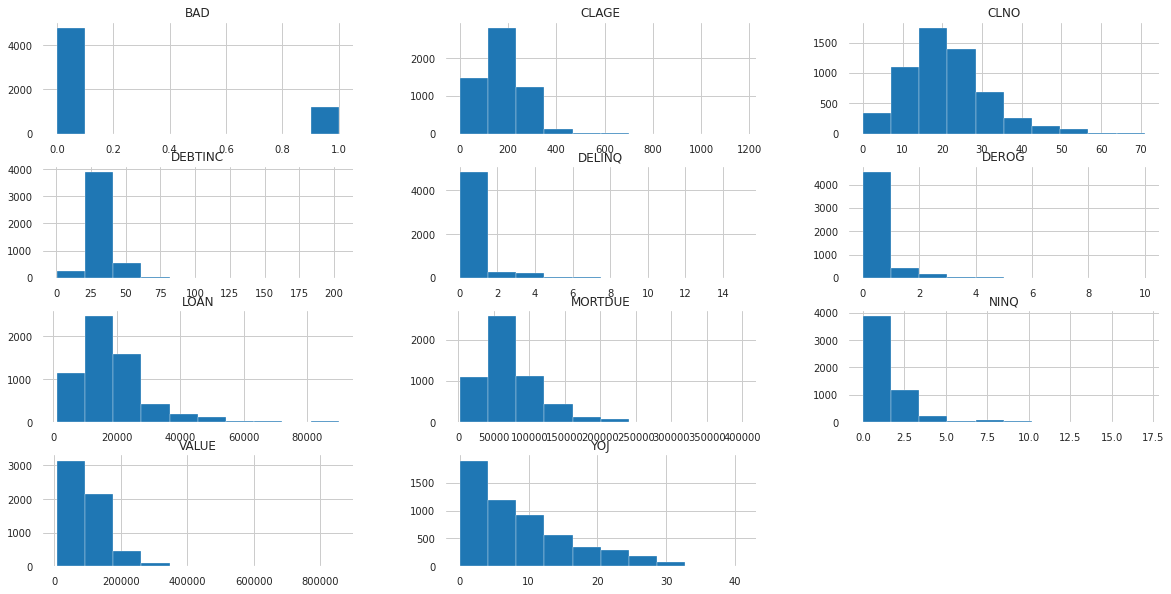

In [6]:
# avaliação das variáveis numéricas por meio de histogramas
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(20,10))

Na análise inicial, se observa que a variável Target('BAD'), possui um número pequeno de 'maus pagadores'(=1), o que indica que é uma base desbalanceada, sendo necessários ajustes ou métricas específicas para essa distribuição

## Tratamento dos Dados

Para o tratamento, serão avaliadas a existência de missing values ou valores null.

In [7]:
MissingValues =df.isnull().sum().rename_axis('Colunas').reset_index(name='Missing Values')
MissingValues

Colunas  Missing Values
0       BAD               0
1      LOAN               0
2   MORTDUE             518
3     VALUE             112
4    REASON             252
5       JOB             279
6       YOJ             515
7     DEROG             708
8    DELINQ             580
9     CLAGE             308
10     NINQ             510
11     CLNO             222
12  DEBTINC            1267

Pelo quadro acima, se observa que a base de dados não foi tratada, havendo uma quantidade alta de missings. Para a análise foram excluídos as linhas que possuiam algum valor com NA, restando 3364 linhas.

In [8]:
# retirando os na
df2 = df.copy()
df2.dropna(axis=0,how='any',inplace= True)
df2.info(), df2.isna().any() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 13 columns):
BAD        3364 non-null int64
LOAN       3364 non-null int64
MORTDUE    3364 non-null float64
VALUE      3364 non-null float64
REASON     3364 non-null object
JOB        3364 non-null object
YOJ        3364 non-null float64
DEROG      3364 non-null float64
DELINQ     3364 non-null float64
CLAGE      3364 non-null float64
NINQ       3364 non-null float64
CLNO       3364 non-null float64
DEBTINC    3364 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 367.9+ KB


(None,
 BAD        False
 LOAN       False
 MORTDUE    False
 VALUE      False
 REASON     False
 JOB        False
 YOJ        False
 DEROG      False
 DELINQ     False
 CLAGE      False
 NINQ       False
 CLNO       False
 DEBTINC    False
 dtype: bool)

## Análise Descritiva Exploratória (EDA)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa33bee3390>,
      dtype=object)

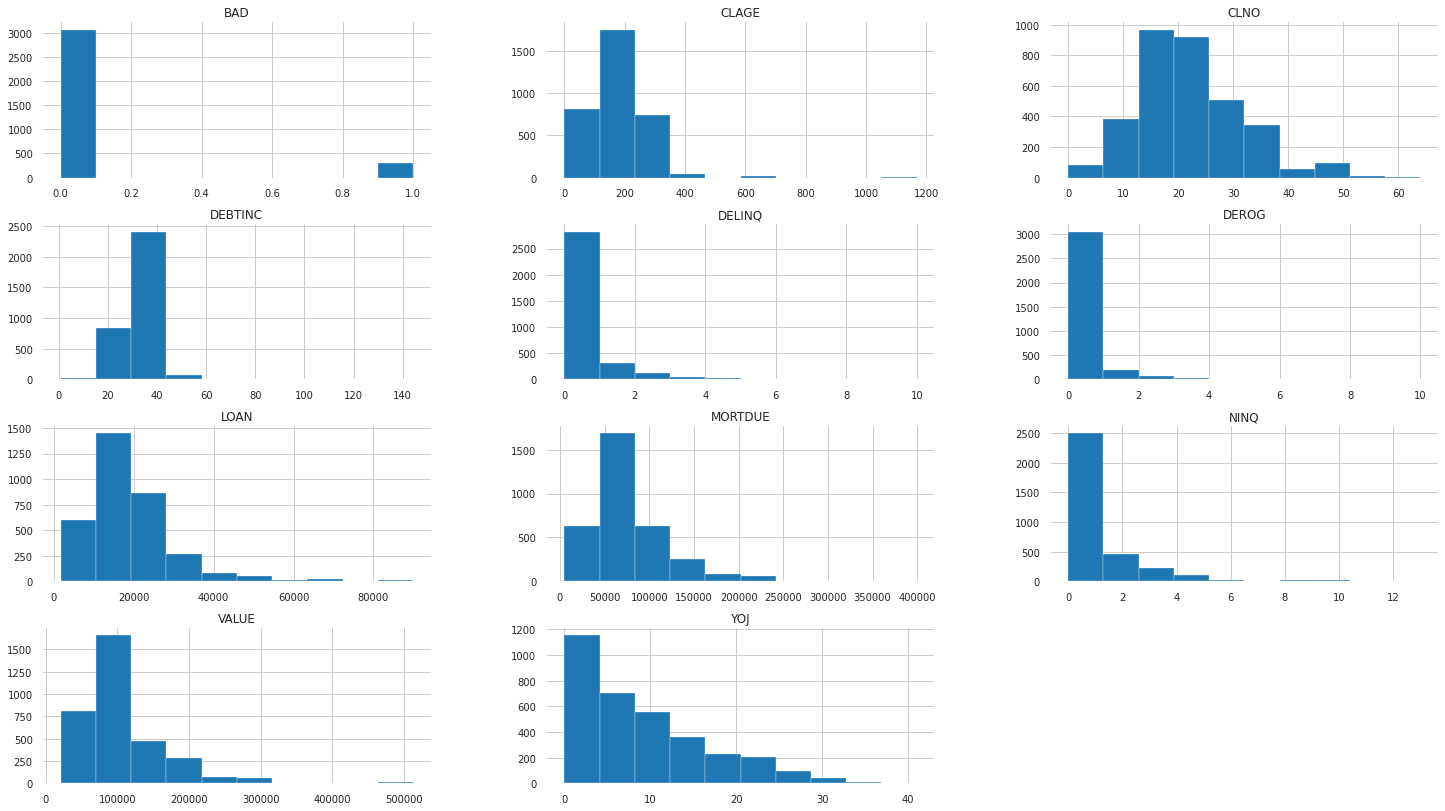

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
df2.hist(figsize=(25,14),bins=10)

A avaliação dos histogramas mostra inicialmente que :
- A variável BAD (Target) possui poucos valores 1 para treinamento do modelo
- A maior parte dos valores totais de financiamento (LOAN) possuem uma distribuição próxima da normalidade, e os valores a receber(MORTDUE), na média, são maiores que os totais emprestados. Observa-se o terror dos juros bancários
- Os valores das propriedades possuem distribuição próxima dos valores dos financiamentos
- O DEROG, algo equivalente à um aviso de negativação do serviço de proteção ao consumidor, é baixo, contudo possui uma correlação próxima de moderada(p=0,25) com os maus pagadores.
- O DELINQ, linhas de crédito com inadimplência, também possui correlação próxima à moderada(p=0,27) com maus pagadores
- O número de linhas de crédito possui correlação, mas a intensidade é menor(p=0,13), com maus pagadores
- Por fim, a base possui um indicador (Débitos/Renda) que possui uma correlação próxima a moderada (p=0,23), sendo um bom indicador.

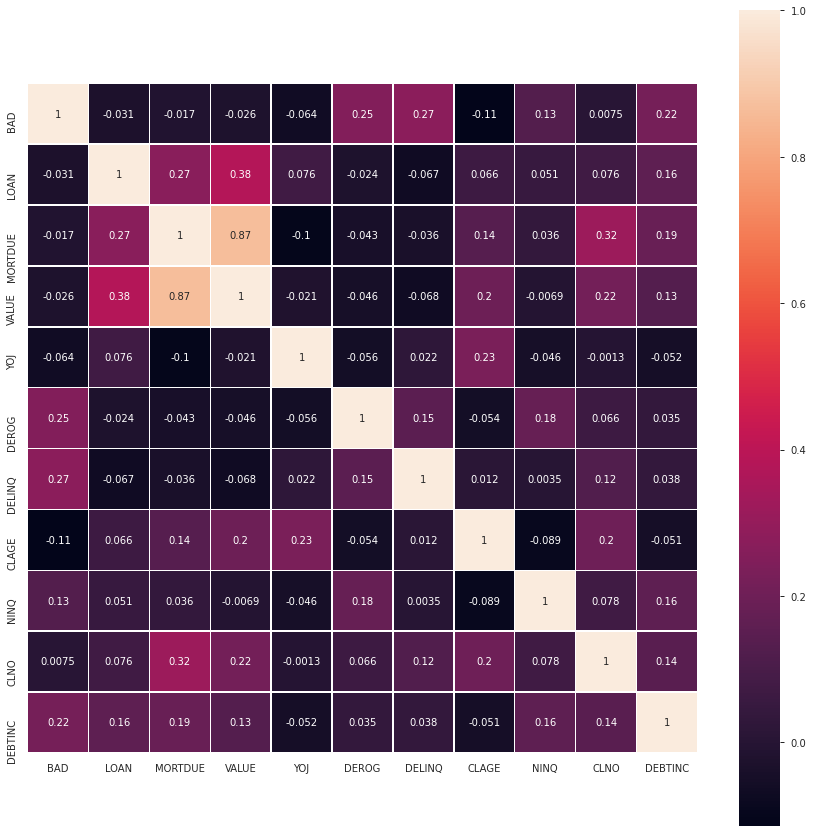

In [10]:
# Correlação das variáveis numéricas
plt.figure(figsize= (15, 15))

sns.heatmap(df2.corr(), square=True, annot=True, linewidth=0.5)

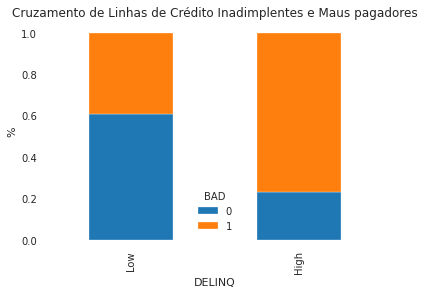

In [11]:
dfWithBin = df.copy()
bins=[0,3,15] 
group=['Low','High'] 
dfWithBin['DELINQ_bin']=pd.cut(dfWithBin['DELINQ'],bins,labels=group)
LOAN_bin=pd.crosstab(dfWithBin['DELINQ_bin'],dfWithBin['BAD'])
LOAN_bin.div(LOAN_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,title='Cruzamento de Linhas de Crédito Inadimplentes e Maus pagadores')
plt.xlabel('DELINQ')
P= plt.ylabel('%')

A título de demonstração da correlação entre os valores, o gráfico acima explicita que um número alto de linhas de crédito inadimplentes tem relação positiva com maus pagadores.

Se observa que, os devedores(BAD)  em média fizeram empréstimos de 19.260,00, contudo sua dívida em média está em $ 73.864,00.

In [12]:
#avaliacao dos default loans

df2[df2['BAD']==1].drop('BAD', axis=1).describe().style.format("{:.2f}")

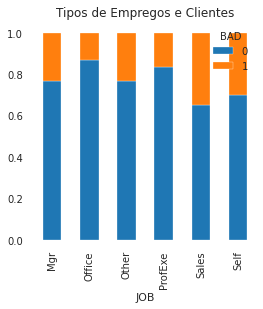

In [13]:
# Avaliando as variáveis categóricas em relacao ao pefil do pagador

JOB=pd.crosstab(df['JOB'],df['BAD'])
JOB.div(JOB.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='Tipos de Empregos e Clientes', figsize=(4,4))

Pela análise, se observa que o grupo que trabalha com vendas e empreendedores possuem um número maior de maus pagadores

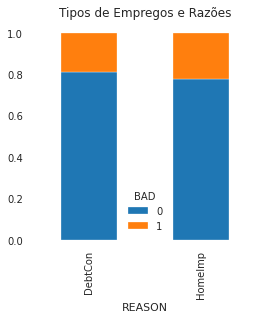

In [14]:
REASON=pd.crosstab(df['REASON'],df['BAD'])
REASON.div(REASON.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='Tipos de Empregos e Razões', figsize=(4,4))

A variável razão do débito apresentou valores próximos para as duas categorias, o que não dá muita informação ao modelo

### Featuring Engineering

Para melhor ajuste ao modelo, foram dummizadas as tabelas com type Object

In [15]:
# Gerando Dummies para modelos que utilizam apenas variaveis numéricas

df2 = pd.get_dummies(df2, columns=['REASON', 'JOB'])

In [16]:
df2.head().T

5             7              19            25  \
BAD                 1.000000      1.000000       0.000000      1.000000   
LOAN             1700.000000   1800.000000    2300.000000   2400.000000   
MORTDUE         30548.000000  28502.000000  102370.000000  34863.000000   
VALUE           40320.000000  43034.000000  120953.000000  47471.000000   
YOJ                 9.000000     11.000000       2.000000     12.000000   
DEROG               0.000000      0.000000       0.000000      0.000000   
DELINQ              0.000000      0.000000       0.000000      0.000000   
CLAGE             101.466002     88.766030      90.992533     70.491080   
NINQ                1.000000      0.000000       0.000000      1.000000   
CLNO                8.000000      8.000000      13.000000     21.000000   
DEBTINC            37.113614     36.884894      31.588503     38.263601   
REASON_DebtCon      0.000000      0.000000       0.000000      0.000000   
REASON_HomeImp      1.000000      1.000000       1.000000      1.000000   
JOB_Mgr             0.000000      0.000000       0.000000      1.000000   
JOB_Office          0.000000      0.000000       1.000000      0.000000   
JOB_Other           1.000000      1.000000       0.000000      0.000000   
JOB_ProfExe         0.000000      0.000000       0.000000      0.000000   
JOB_Sales           0.000000      0.000000       0.000000      0.000000   
JOB_Self            0.000000      0.000000       0.000000      0.000000   

                           26  
BAD                  0.000000  
LOAN              2400.000000  
MORTDUE          98449.000000  
VALUE           117195.000000  
YOJ                  4.000000  
DEROG                0.000000  
DELINQ               0.000000  
CLAGE               93.811775  
NINQ                 0.000000  
CLNO                13.000000  
DEBTINC             29.681827  
REASON_DebtCon       0.000000  
REASON_HomeImp       1.000000  
JOB_Mgr              0.000000  
JOB_Office           1.000000  
JOB_Other            0.000000  
JOB_ProfExe          0.000000  
JOB_Sales            0.000000  
JOB_Self             0.000000

In [17]:
#Normalizando os dados para facilitar possível visualizacoes

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df3 = pd.DataFrame(sc.fit_transform(df2), columns=df2.columns)

## Geração Amostras de Treino e Teste

Nota: Neste trabalho foi realizada a modelagem utilzando uma amostra para validação inclusive, contudo, devida a baixa quantidade de registros, foi utilizado apenas treino e teste 

In [18]:
# importando a biblioteca
from sklearn.model_selection import train_test_split

In [19]:
#Etapa 1- Primeiro Separando em Treino e Teste, parâmetro test_size = 0.25 (default)
treino, teste = train_test_split(df2, random_state=42)

#Etapa 2 -  Separando o Treino em treino e validacao, para refinar o modelo
#treino, validacao = train_test_split(treino, random_state=42)

treino.shape, teste.shape # validacao.shape, 

((2523, 19), (841, 19))

In [20]:
teste.describe()

BAD          LOAN        MORTDUE          VALUE         YOJ  \
count  841.000000    841.000000     841.000000     841.000000  841.000000   
mean     0.083234  18765.873960   76463.022592  106836.300832    8.825208   
std      0.276400  11076.284757   45237.628296   54508.531940    7.649565   
min      0.000000   1700.000000    5076.000000   21144.000000    0.000000   
25%      0.000000  11400.000000   49264.000000   70059.000000    3.000000   
50%      0.000000  16500.000000   68049.000000   92742.000000    7.000000   
75%      0.000000  23300.000000   91402.000000  121598.000000   13.000000   
max      1.000000  89800.000000  371003.000000  469771.000000   36.000000   

            DEROG      DELINQ       CLAGE        NINQ        CLNO     DEBTINC  \
count  841.000000  841.000000  841.000000  841.000000  841.000000  841.000000   
mean     0.116528    0.263971  180.728608    0.944114   22.126040   33.937425   
std      0.498307    0.864235   80.505816    1.468873    9.156226    7.710000   
min      0.000000    0.000000   12.176929    0.000000    1.000000    5.226674   
25%      0.000000    0.000000  117.648283    0.000000   16.000000   29.209023   
50%      0.000000    0.000000  176.656895    0.000000   21.000000   34.921021   
75%      0.000000    0.000000  229.518295    1.000000   27.000000   38.662402   
max      8.000000   10.000000  639.058172   13.000000   55.000000  114.050528   

       REASON_DebtCon  REASON_HomeImp     JOB_Mgr  JOB_Office   JOB_Other  \
count      841.000000      841.000000  841.000000  841.000000  841.000000   
mean         0.700357        0.299643    0.135553    0.167658    0.392390   
std          0.458374        0.458374    0.342517    0.373784    0.488573   
min          0.000000        0.000000    0.000000    0.000000    0.000000   
25%          0.000000        0.000000    0.000000    0.000000    0.000000   
50%          1.000000        0.000000    0.000000    0.000000    0.000000   
75%          1.000000        1.000000    0.000000    0.000000    1.000000   
max          1.000000        1.000000    1.000000    1.000000    1.000000   

       JOB_ProfExe   JOB_Sales    JOB_Self  
count   841.000000  841.000000  841.000000  
mean      0.256837    0.014269    0.033294  
std       0.437149    0.118667    0.179509  
min       0.000000    0.000000    0.000000  
25%       0.000000    0.000000    0.000000  
50%       0.000000    0.000000    0.000000  
75%       1.000000    0.000000    0.000000  
max       1.000000    1.000000    1.000000

In [21]:
# Verificando se as amostras possuem similaridade, avaliando se há discrepância alta considerando a média e desvio padrão de cada uma. Pela análise verifica-se que a amostra gerada 
# possuem estatísticas próximas, portanto atendem ao requisito.
treino.describe()

BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  2523.000000   2523.000000    2523.000000    2523.000000  2523.000000   
mean      0.091161  19283.908046   76178.487911  107723.080856     9.205311   
std       0.287895  10806.751911   45056.616268   54810.263059     7.577923   
min       0.000000   1800.000000    5106.000000   23031.000000     0.000000   
25%       0.000000  12200.000000   49378.000000   71430.500000     3.000000   
50%       0.000000  17100.000000   66839.000000   94895.000000     8.000000   
75%       0.000000  24100.000000   93303.500000  122446.000000    13.000000   
max       1.000000  89900.000000  399412.000000  512650.000000    41.000000   

             DEROG       DELINQ        CLAGE         NINQ         CLNO  \
count  2523.000000  2523.000000  2523.000000  2523.000000  2523.000000   
mean      0.156956     0.283789   181.082043     1.068569    22.110186   
std       0.603928     0.790709    83.525614     1.574874     9.464893   
min       0.000000     0.000000     0.486711     0.000000     0.000000   
25%       0.000000     0.000000   119.076440     0.000000    16.000000   
50%       0.000000     0.000000   176.749163     1.000000    21.000000   
75%       0.000000     0.000000   230.438905     2.000000    27.000000   
max      10.000000     8.000000  1168.233561    11.000000    64.000000   

           DEBTINC  REASON_DebtCon  REASON_HomeImp      JOB_Mgr   JOB_Office  \
count  2523.000000     2523.000000     2523.000000  2523.000000  2523.000000   
mean     34.201460        0.705509        0.294491     0.133175     0.172810   
std       8.030684        0.455904        0.455904     0.339831     0.378158   
min       0.838118        0.000000        0.000000     0.000000     0.000000   
25%      29.437266        0.000000        0.000000     0.000000     0.000000   
50%      35.223971        1.000000        0.000000     0.000000     0.000000   
75%      39.192646        1.000000        1.000000     0.000000     0.000000   
max     144.189001        1.000000        1.000000     1.000000     1.000000   

         JOB_Other  JOB_ProfExe    JOB_Sales     JOB_Self  
count  2523.000000  2523.000000  2523.000000  2523.000000  
mean      0.378914     0.270709     0.016250     0.028141  
std       0.485213     0.444414     0.126462     0.165409  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000  
75%       1.000000     1.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000

In [22]:
#Selecionando as colunas que usaremos para treinar o modelo
nao_usadas = ['BAD']

# Lista das colunas que serão usadas
usadas = [c for c in treino.columns if c not in nao_usadas]

## Métricas de Avaliação

Para a avaliação do modelo serão utilizadas duas métricas,sendo a Accuracy(Acurácia) e o F1 Score, melhor detalhados abaixo:

<img src="https://miro.medium.com/max/1000/1*t1vf-ofJrJqtmam0KSn3EQ.png" width="250px"/>

A **Accuracy** mede a performance do modelo como um todo, contudo não é uma métrica interessante em situações de bases muito desbalanceadas.

A **Precision** é importante quando os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. Sendo uma métrica interessante para o modelo em análise caso o apetite à risco do Banco seja baixo, logo se para o Banco acertar na predição dos maus pagadores seja mais importante que acabar deixando de emprestar para algum bom pagador que o modelo etiquetou errado.

O **Recall**, ao contrário,  pode ser usada em situações em que os Falsos Negativos são mais prejudiciais que os Falso Positivos. Nesse sentido, o foco seria ter mais produtos financiamentos aprovados, assim, o Banco sofre mais deixando de vender para os bons pagadores do que aceitando um mau pagador etiquetado como bom.

O **F1 Score** é uma média harmônica entre de Precision e Recall, portanto, quando tem-se um F1-Score baixo, é um indicativo de que ou a precisão ou o recall está baixo.






In [23]:
# Avaliando desempenho do modelo
#importando métrica
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
results = pd.DataFrame(columns=['Modelo', 'Accuracy', 'F1score'])

## Modelo RandomForest Classifier

As Florestas aleatórias ou florestas de decisão aleatória são modelos ensemble das DecisionTree, que utilizam um método de aprendizado conjunto para classificação,regressão e outras tarefas que operam construindo uma infinidade de árvores de decisão no momento do treinamento e gerando a classe que é o modo das classes ou a previsão média das árvores individuais.

In [24]:
# importanto o modelo
from sklearn.ensemble import RandomForestClassifier

#instanciando o modelo
rf = RandomForestClassifier(n_estimators=200,random_state=42)

In [25]:
# treinando o modelo
rf.fit(treino[usadas], treino['BAD'])

#Prevendo os dados de validacao

# gerando predicoes do modelo com os dados de teste
pred_teste = rf.predict(teste[usadas])

#Medindo a acuracia nos dados de teste
results.loc[0]= ['RandonForest sem ajuste', accuracy_score(teste['BAD'],pred_teste), f1_score(teste['BAD'],pred_teste)]

accuracy_score(teste['BAD'],pred_teste), f1_score(teste['BAD'],pred_teste)


(0.9560047562425684, 0.6407766990291262)

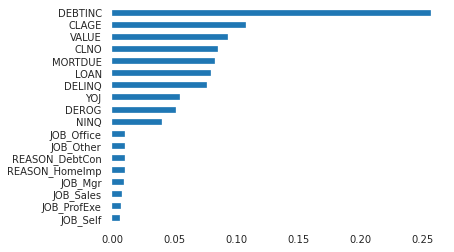

In [26]:
# Avaliando a importancia de cada coluna (cada variável de entrada)
pd.Series(rf.feature_importances_, index=usadas).sort_values().plot.barh()

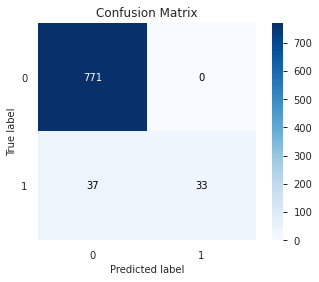

In [27]:
# importando a bilbioteca para plotar o gráfico de Matriz de Confusão
import scikitplot as skplt

# Matriz de Confusão - Dados de Validação
skplt.metrics.plot_confusion_matrix(teste['BAD'], pred_teste)


Pela análise da Matriz de Confusão, considerando que é uma base bastante desbalanceada, como se observa no gráfico abaixo. Assim, a análise das métricas de especifidade e esforço pode realçar os falsos positivos

### Utilizando o RandonForest Classifier com ajuste nos parâmetros

Foram ajustados os parâmetros de aumentando o número de estimadores para 900, quando o default é 100, e informando que o número de folhas aceitavel para as ramificações das árvores de decisão como 2.


In [28]:
# Setando parametros
rf2 = RandomForestClassifier(max_depth=None, random_state=42, n_jobs=-1, n_estimators=900,
                            min_impurity_decrease=1e-3, min_samples_leaf=2,  class_weight='balanced')
# treinando o modelo RF2
rf2.fit(treino[usadas], treino['BAD'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
#relizando a predicao do RF2 com base teste
pred_teste2 = rf2.predict(teste[usadas])

#métrica para RF2 validacao
results.loc[1]= ['RandonForest COM ajuste', accuracy_score(teste['BAD'],pred_teste2), f1_score(teste['BAD'],pred_teste2)]

accuracy_score(teste['BAD'],pred_teste2), f1_score(teste['BAD'],pred_teste2)

(0.9524375743162902, 0.6491228070175439)

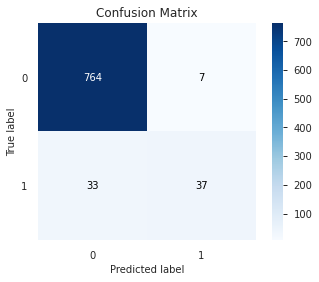

In [30]:
# Matriz de Confusão - Dados de Validação
skplt.metrics.plot_confusion_matrix(teste['BAD'], pred_teste2)

Com os ajustes de parâmetros, houve uma melhora pequena no F1 Score.

## Modelo XGBoost

O XGBoost é uma implementação de árvores de decisão aprimoradas por gradiente, projetadas para velocidade e desempenho.Sua sigla significa eXtreme Gradient Boosting, e sua vantagem é devida a uma implementação de máquinas de aumento de gradiente.

In [31]:
# Importar o modelo
from xgboost import XGBClassifier

# Instanciar o modelo
xgb = XGBClassifier(n_jobs=-1, random_state=42)

# treinando o modelo
xgb.fit(treino[usadas],treino['BAD']) 

# Fazendo predições
#pred_xgb_validacao = xgb.predict(validacao[usadas])

# Metrícas XGB validacao
#accuracy_score(validacao['BAD'],pred_xgb_validacao), balanced_accuracy_score(validacao['BAD'],pred_xgb_validacao), f1_score(validacao['BAD'],pred_xgb_validacao)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [32]:
# Fazendo predições
pred_xgb_teste = xgb.predict(teste[usadas])

# Metrícas XGB teste
results.loc[2]= ['XGBoost', accuracy_score(teste['BAD'],pred_xgb_teste), f1_score(teste['BAD'],pred_xgb_teste)]

accuracy_score(teste['BAD'],pred_xgb_teste), f1_score(teste['BAD'],pred_xgb_teste)

(0.9583828775267539, 0.6846846846846847)

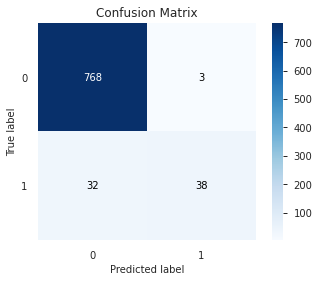

In [33]:
# Matriz de Confusão - Dados de Validação
skplt.metrics.plot_confusion_matrix(teste['BAD'], pred_xgb_teste)

O XGBoost apresentou uma melhora um pouco maior no modelo, contudo não foi significante.

## Modelo XGBoost com GridSearchCV

O GridSearchCV é um módulo do Scikit Learn que é amplamente usado para automatizar grande parte do processo de tuning. O objetivo primário do GridSearchCV é a criação de combinações de parâmetros para posteriormente avaliá-las.

In [34]:
# Importação bibliotecas
# Importação GridSearchCV.
from sklearn.model_selection import GridSearchCV

# Uso do constructor do XGBoost para criar um classifier.
xgb2 = XGBClassifier(n_jobs=-1) # Sem nada dentro, pois vamos "variar" os parâmetros.

In [35]:
# Para o balaceamento do gridSearchCV foram realizadas três rodadas, a partir dos best score de cada época. 
parametros = {'n_estimators':[100,500, 900, 1100],
              'learning_rate':[0.02,0.08,0.09,1.5]}

In [36]:
# Importando o Make Scorer
from sklearn.metrics import make_scorer

# Importando os módulos de cálculo de métricas
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [37]:
# Criando um dicionário com as métricas que desejo calcular.
meus_scores = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(f1_score)}

# Exemplo para o uso scoring igual ao meus_scores.
grid = GridSearchCV(estimator = xgb2,
                      param_grid = parametros,
                      cv = 10,
                      scoring = meus_scores,   # É o meus_scores
                      refit = 'f1')            # Observe que foi configurado para f1

# Imprime o melhor score(f1) e melhor parâmetro 
grid.fit(treino[usadas],treino['BAD'])

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.02, 0.08, 0.09, 1.5],
                         'n_estimators': [100, 500, 900, 1100]},
             pre_dispatch='2*n_jobs', refit='f1', ret

In [38]:
grid.best_score_, grid.best_params_

(0.6383605892313324, {'learning_rate': 0.09, 'n_estimators': 1100})

In [39]:
#  Caso queira dar uma olhada nos outros scores
pd.DataFrame(grid.cv_results_).sort_values('rank_test_f1')[:3].T

11  \
mean_fit_time                                                3.96773   
std_fit_time                                               0.0278867   
mean_score_time                                            0.0251537   
std_score_time                                           0.000646666   
param_learning_rate                                             0.09   
param_n_estimators                                              1100   
params                 {'learning_rate': 0.09, 'n_estimators': 1100}   
split0_test_accuracy                                        0.964427   
split1_test_accuracy                                        0.944664   
split2_test_accuracy                                        0.948617   
split3_test_accuracy                                        0.968254   
split4_test_accuracy                                        0.952381   
split5_test_accuracy                                        0.944444   
split6_test_accuracy                                        0.964286   
split7_test_accuracy                                        0.924603   
split8_test_accuracy                                        0.944444   
split9_test_accuracy                                        0.948413   
mean_test_accuracy                                          0.950453   
std_test_accuracy                                          0.0122011   
rank_test_accuracy                                                 1   
split0_test_recall                                          0.652174   
split1_test_recall                                          0.478261   
split2_test_recall                                          0.434783   
split3_test_recall                                          0.652174   
split4_test_recall                                          0.478261   
split5_test_recall                                          0.391304   
split6_test_recall                                          0.608696   
split7_test_recall                                          0.304348   
split8_test_recall                                          0.478261   
split9_test_recall                                          0.434783   
mean_test_recall                                            0.491304   
std_test_recall                                             0.108347   
rank_test_recall                                                   1   
split0_test_precision                                         0.9375   
split1_test_precision                                       0.846154   
split2_test_precision                                              1   
split3_test_precision                                              1   
split4_test_precision                                              1   
split5_test_precision                                              1   
split6_test_precision                                              1   
split7_test_precision                                            0.7   
split8_test_precision                                       0.846154   
split9_test_precision                                              1   
mean_test_precision                                         0.932981   
std_test_precision                                         0.0981467   
rank_test_precision                                                7   
split0_test_f1                                              0.769231   
split1_test_f1                                              0.611111   
split2_test_f1                                              0.606061   
split3_test_f1                                              0.789474   
split4_test_f1                                              0.647059   
split5_test_f1                                                0.5625   
split6_test_f1                                              0.756757   
split7_test_f1                                              0.424242   
split8_test_f1                                              0.611111   
split9_test_f1                    

In [40]:
# Criando um objeto que os melhores parametros.
xgb_gs = grid.best_estimator_

# Visualizar o objeto para conferir os parametros.
xgb_gs

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.09, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [41]:
#primeira epoca 
# Fazendo predições teste
pred_xgb_gs_teste = xgb_gs.predict(teste[usadas])

# Metrícas XGB teste
results.loc[3]= ['XGBoost com GridSearchCV',accuracy_score(teste['BAD'],pred_xgb_gs_teste), f1_score(teste['BAD'],pred_xgb_gs_teste)]

accuracy_score(teste['BAD'],pred_xgb_gs_teste), f1_score(teste['BAD'],pred_xgb_gs_teste)

(0.9583828775267539, 0.6788990825688073)

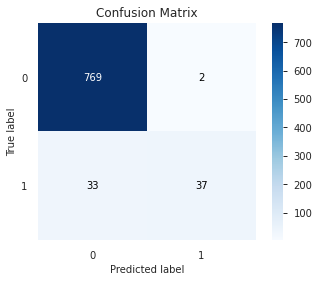

In [42]:
# Matriz de Confusão - Dados de Validação
skplt.metrics.plot_confusion_matrix(teste['BAD'], pred_xgb_gs_teste)

## Modelo Random Forest Classifier e GridSearchCV 

Por fim, a título de avaliação, foi testada a Random Forest com tuning pelo GridSearchCV para verifiar possível melhora no modelo.

In [43]:
#instanciando o modelo
rf2=RandomForestClassifier(n_jobs=-1)

#setando parametros para o gridSearchCV
param_dict = { 'n_estimators':[100,400,800,1000],
               'criterion': ['gini','entropy']
              }

grid2 = GridSearchCV(rf2, param_dict, cv=10)

#treinando modelo
grid2.fit(treino[usadas], treino['BAD'])

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random

In [44]:
#Resultados
grid2.best_params_ , grid2.best_score_

({'criterion': 'gini', 'n_estimators': 100}, 0.9468818620992533)

In [45]:
# Criando um objeto que os melhores parametros.
rf2_gs2 = grid2.best_estimator_

# Visualizar o objeto para conferir os parametros.
rf2_gs2


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [46]:
# predicao teste
pred_rf2_gs2_teste = rf2_gs2.predict(teste[usadas])

# metricas predicao teste
results.loc[4]= ['RandomForest com GridSearchCV', accuracy_score(teste['BAD'],pred_rf2_gs2_teste),f1_score(teste['BAD'],pred_rf2_gs2_teste)]

accuracy_score(teste['BAD'],pred_rf2_gs2_teste), f1_score(teste['BAD'],pred_rf2_gs2_teste)

(0.9571938168846611, 0.6538461538461539)

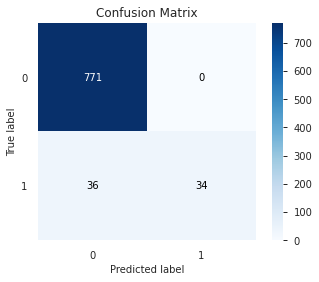

In [47]:
# Matriz de Confusão - Dados de Validação
skplt.metrics.plot_confusion_matrix(teste['BAD'], pred_rf2_gs2_teste)

# Conclusão

**Pela Análise dos Modelos, verifica-se que o que apresentou o melhor resultado foi XGBoost, com as métricas de acurária 0.958 e F1 Score 0.6846)**

In [48]:
results

Modelo  Accuracy   F1score
0        RandonForest sem ajuste  0.956005  0.640777
1        RandonForest COM ajuste  0.952438  0.649123
2                        XGBoost  0.958383  0.684685
3       XGBoost com GridSearchCV  0.958383  0.678899
4  RandomForest com GridSearchCV  0.957194  0.653846